# ASSIGNMENT 7 : Logistic Regression

## Task 1 : Data exploration 

In [53]:
# import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [259]:
# load the datasets
# Hence the train and test data is already splitted.

train_data = pd.read_csv("Titanic_train.csv")
test_data = pd.read_csv("Titanic_test.csv")


In [55]:
# see the detailed information about train and test data.
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [260]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


## Task 2: Handling Missing values.


In [57]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [58]:
# there are lot of null values in cabin so delete that row.
train_data.drop("Cabin",axis=1,inplace=True)

In [261]:
test_data.drop("Cabin",axis=1,inplace = True)

In [60]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [262]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [62]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [263]:
test_data.isna().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [264]:
# replace the age and Fare with mean.

test_data.Age.fillna(test_data.Age.mean(),axis=0,inplace=True)

In [265]:
test_data.Fare.fillna(test_data.Fare.mean(),axis=0,inplace=True)

In [266]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [67]:
train_data.Age.fillna(train_data.Age.mean(),axis=0,inplace=True)
train_data.Fare.fillna(train_data.Fare.mean(),axis=0,inplace=True)

In [68]:
train_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [69]:
# fill the embarked feature with the mode value.

train_data.Embarked.fillna(train_data.Embarked.mode()[0],axis=0,inplace=True)

In [70]:
train_data.Embarked.isna().sum()

0

## task 3 : feature selection

In [71]:
# the target varaible is not dependent on the PassengerId, and Ticket,Name
# So delete those features from the train and test data.

train_data.drop(["Name","PassengerId","Ticket"],axis=1,inplace=True)

In [267]:
test_data.drop(["Name","PassengerId","Ticket"],axis = 1,inplace = True)

In [73]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [268]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


 Transforming the features to it's related data types.
 
 We know that the survived, Sex,Pclass,Embarked are categorical data but they are assigned with different data type

So Convert the data types of the features (Pclass,Sex,Embarked,Survived),to categorical data.



In [75]:
train_data.Pclass = train_data.Pclass.astype("category")

In [76]:
train_data.Sex = train_data.Sex.astype("category")
train_data.Embarked= train_data.Embarked.astype("category")

In [77]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    category
 2   Sex       891 non-null    category
 3   Age       891 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Embarked  891 non-null    category
dtypes: category(3), float64(2), int64(3)
memory usage: 37.9 KB


In [78]:
train_data.Survived = train_data.Survived.astype("category")

In [79]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Sex       891 non-null    category
 3   Age       891 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Embarked  891 non-null    category
dtypes: category(4), float64(2), int64(2)
memory usage: 32.0 KB


In [269]:
test_data.Pclass = test_data.Pclass.astype("category")
test_data.Sex = test_data.Sex.astype("category")
test_data.Embarked = test_data.Embarked.astype("category")

In [270]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    category
 1   Sex       418 non-null    category
 2   Age       418 non-null    float64 
 3   SibSp     418 non-null    int64   
 4   Parch     418 non-null    int64   
 5   Fare      418 non-null    float64 
 6   Embarked  418 non-null    category
dtypes: category(3), float64(2), int64(2)
memory usage: 14.8 KB


### Transform the categorical data with onehot encoding.(dummies variable)

In [271]:
test_data = pd.get_dummies(test_data,dtype=int,drop_first=True)

In [272]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         418 non-null    float64
 1   SibSp       418 non-null    int64  
 2   Parch       418 non-null    int64  
 3   Fare        418 non-null    float64
 4   Pclass_2    418 non-null    int32  
 5   Pclass_3    418 non-null    int32  
 6   Sex_male    418 non-null    int32  
 7   Embarked_Q  418 non-null    int32  
 8   Embarked_S  418 non-null    int32  
dtypes: float64(2), int32(5), int64(2)
memory usage: 21.4 KB


### Visualization:


<Axes: xlabel='Pclass'>

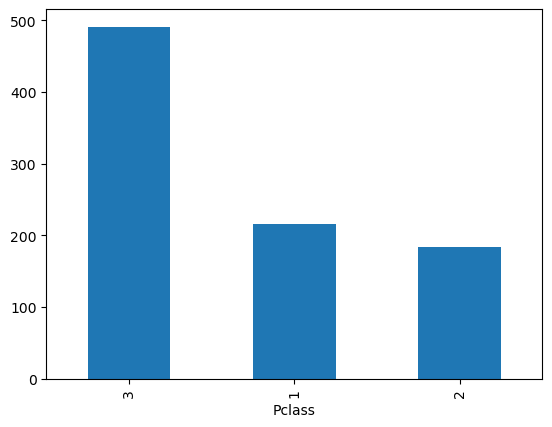

In [94]:
train_data.Pclass.value_counts().plot(kind="bar")

<Axes: xlabel='Sex'>

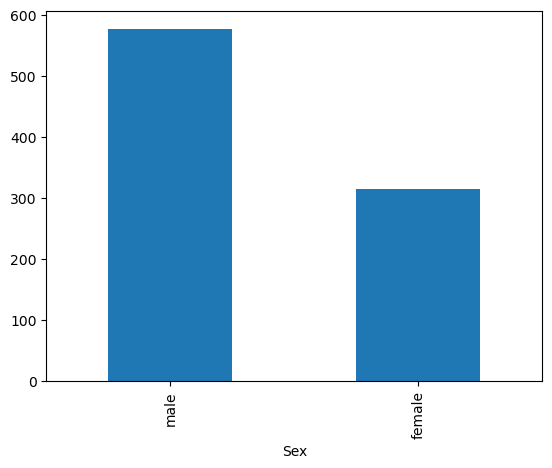

In [96]:
train_data.Sex.value_counts().plot(kind="bar")

<Axes: xlabel='Embarked'>

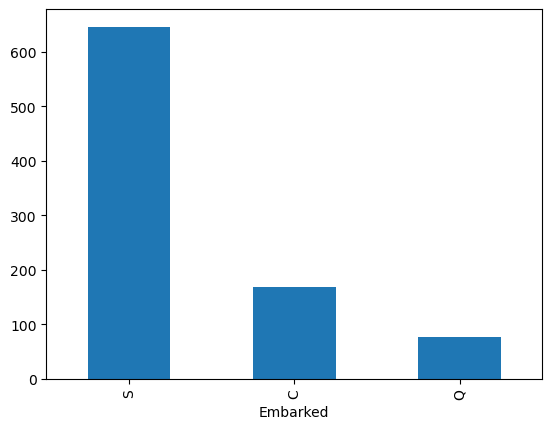

In [97]:
train_data.Embarked.value_counts().plot(kind="bar")

<Axes: xlabel='Survived', ylabel='Age'>

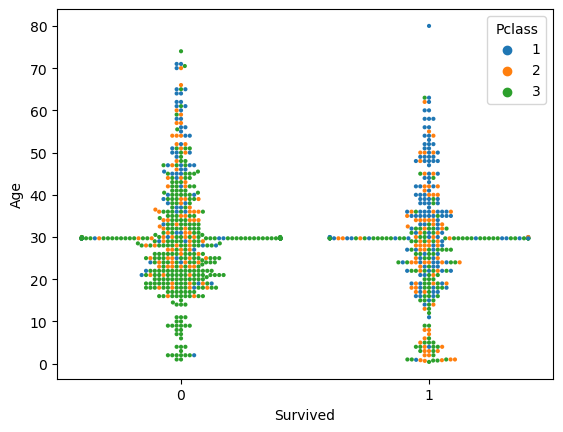

In [111]:
sns.swarmplot(y="Age",x="Survived",data=train_data,hue="Pclass",size=3)

From the swarn plot we can analyze the following insights:
1. Passengers in Pclass 3 are mostly not survived.
2. Survived passengers are mostly belongs to the age of 18 to 40 years.
3. Survived rate is less than the Not-survived rate.

<Axes: xlabel='Survived', ylabel='Fare'>

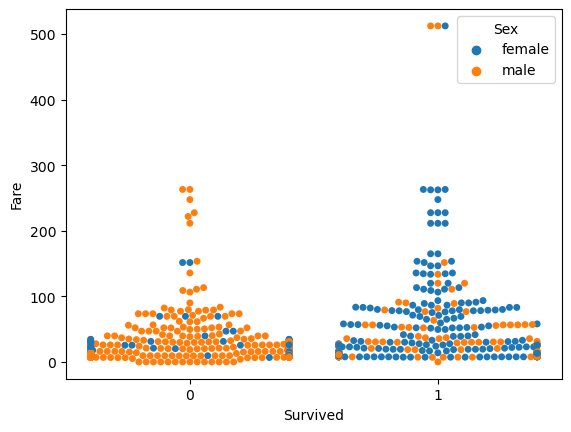

In [116]:
sns.swarmplot(x="Survived",y="Fare",hue="Sex",data=train_data)

From the Swarm plot between fare and Survived we can interpret the following insights:
1. Survival rate is very low for male as compare to female.
2. Most of the passenger who has fare value between o and 100 are survived and not-survived.
3. Hence may be Fare is not useful for predictiong the survival rate.

In [120]:
clean_train_data = pd.get_dummies(train_data,dtype=int,drop_first=True)

In [123]:
clean_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         891 non-null    float64
 1   SibSp       891 non-null    int64  
 2   Parch       891 non-null    int64  
 3   Fare        891 non-null    float64
 4   Survived_1  891 non-null    int32  
 5   Pclass_2    891 non-null    int32  
 6   Pclass_3    891 non-null    int32  
 7   Sex_male    891 non-null    int32  
 8   Embarked_Q  891 non-null    int32  
 9   Embarked_S  891 non-null    int32  
dtypes: float64(2), int32(6), int64(2)
memory usage: 48.9 KB


In [125]:
clean_train_data.rename({"Survived_1":"Survived"},axis=1,inplace=True)

In [129]:
clean_train_data.rename({"Sex_male":"Sex"},axis=1,inplace=True)

In [130]:
clean_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         891 non-null    float64
 1   SibSp       891 non-null    int64  
 2   Parch       891 non-null    int64  
 3   Fare        891 non-null    float64
 4   Survived    891 non-null    int32  
 5   Pclass_2    891 non-null    int32  
 6   Pclass_3    891 non-null    int32  
 7   Sex         891 non-null    int32  
 8   Embarked_Q  891 non-null    int32  
 9   Embarked_S  891 non-null    int32  
dtypes: float64(2), int32(6), int64(2)
memory usage: 48.9 KB


# Normalizing the data:

 In the training data it contains categorical data in the input variables so its better to standardize the dataset with minmax_standardization method.

In [131]:
# split the data into input and output data.
X = pd.concat([clean_train_data.iloc[:,0:4],clean_train_data.iloc[:,5:]],axis=1)

In [132]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         891 non-null    float64
 1   SibSp       891 non-null    int64  
 2   Parch       891 non-null    int64  
 3   Fare        891 non-null    float64
 4   Pclass_2    891 non-null    int32  
 5   Pclass_3    891 non-null    int32  
 6   Sex         891 non-null    int32  
 7   Embarked_Q  891 non-null    int32  
 8   Embarked_S  891 non-null    int32  
dtypes: float64(2), int32(5), int64(2)
memory usage: 45.4 KB


In [133]:
Y = clean_train_data.iloc[:,4]

In [135]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int32
dtypes: int32(1)
memory usage: 3.6 KB


In [136]:
# normalizing the input values.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data= scaler.fit_transform(X)

In [137]:
scaled_df=pd.DataFrame(scaled_data,columns=X.columns)

In [138]:
scaled_df.describe()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.367921,0.065376,0.063599,0.062858,0.206510,0.551066,0.647587,0.086420,0.725028
std,0.163383,0.137843,0.134343,0.096995,0.405028,0.497665,0.477990,0.281141,0.446751
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.271174,0.000000,0.000000,0.015440,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.367921,0.000000,0.000000,0.028213,0.000000,1.000000,1.000000,0.000000,1.000000
75%,0.434531,0.125000,0.000000,0.060508,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [139]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         891 non-null    float64
 1   SibSp       891 non-null    float64
 2   Parch       891 non-null    float64
 3   Fare        891 non-null    float64
 4   Pclass_2    891 non-null    float64
 5   Pclass_3    891 non-null    float64
 6   Sex         891 non-null    float64
 7   Embarked_Q  891 non-null    float64
 8   Embarked_S  891 non-null    float64
dtypes: float64(9)
memory usage: 62.8 KB


In [140]:
scaled_df.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex,Embarked_Q,Embarked_S
0,0.271174,0.125,0.0,0.014151,0.0,1.0,1.0,0.0,1.0
1,0.472229,0.125,0.0,0.139136,0.0,0.0,0.0,0.0,0.0
2,0.321438,0.000,0.0,0.015469,0.0,1.0,0.0,0.0,1.0
3,0.434531,0.125,0.0,0.103644,0.0,0.0,0.0,0.0,1.0
4,0.434531,0.000,0.0,0.015713,0.0,1.0,1.0,0.0,1.0


## Task 4: Model Building

In [141]:
# importing the logistic regression model from sklearn.liner_model

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [142]:
model1 = classifier.fit(scaled_df,Y)

In [143]:
model1

LogisticRegression()

In [146]:
# verify model score with classification report.
from sklearn.metrics import classification_report
print(classification_report(Y,model1.predict(scaled_df)))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       549
           1       0.76      0.70      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891



From the classificatio table the accuracy is 80% so the model is not predicting the target efficiently.

and f1 score for true positive is much less than the true negative.

In [145]:
clean_train_data.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

## Task 5: Evaluationg the model

In [148]:
# creating the confusion matrix to evaluate the model.

from sklearn.metrics import confusion_matrix
confuse_matrix= confusion_matrix(Y,model1.predict(scaled_df))
print(confuse_matrix)

[[474  75]
 [102 240]]


From the confusion matrix the True negative rate is very hight than the True Positive.
And the Fale Positive value is also hight , hence the model is not a very good model so try to modify the input data and build another model.

In [150]:
# ROC Curve.
from sklearn.metrics import roc_curve,auc


In [151]:
fpr,tpr,threshold = roc_curve(Y,model1.predict(scaled_df))

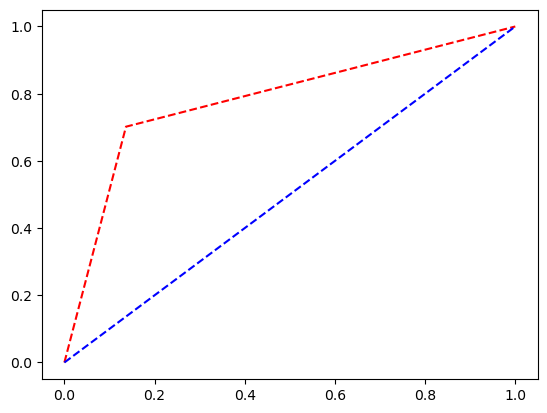

In [154]:
plt.plot(fpr,tpr,color="red",label="logistic model",linestyle="--")
plt.plot([0,1],[0,1],color="blue",linestyle="--")

In [160]:
# the optimum provability value from the roc curve is nearly 0.7 so try to implement that.

y_prob=model1.predict_proba(scaled_df)[:,1]

In [194]:
y_pred = (y_prob >= 0.6).astype(int)

In [195]:
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [197]:
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86       549
           1       0.86      0.63      0.73       342

    accuracy                           0.82       891
   macro avg       0.83      0.78      0.80       891
weighted avg       0.83      0.82      0.81       891



In [198]:
# so when we take the probability of getting 1 , 0.6 then the accuracy is increased.

In [199]:
# lets delete the Fare feature and build the model.

In [200]:
X=scaled_df.drop("Fare",axis=1)

In [201]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         891 non-null    float64
 1   SibSp       891 non-null    float64
 2   Parch       891 non-null    float64
 3   Pclass_2    891 non-null    float64
 4   Pclass_3    891 non-null    float64
 5   Sex         891 non-null    float64
 6   Embarked_Q  891 non-null    float64
 7   Embarked_S  891 non-null    float64
dtypes: float64(8)
memory usage: 55.8 KB


In [202]:
model2 = classifier.fit(X,Y)

In [203]:
print(classification_report(Y,model2.predict(X)))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       549
           1       0.76      0.70      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891



In [206]:
# accuracy is increased by 1 percent.

print(confusion_matrix(Y,model2.predict(X)))

[[474  75]
 [103 239]]


In [207]:
fpr,tpr,threshold = roc_curve(Y,model2.predict(X))

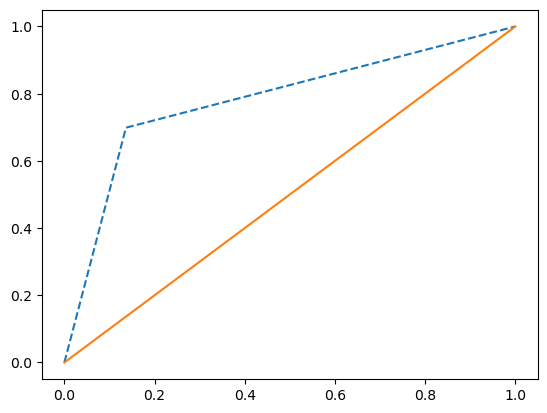

In [209]:
plt.plot(fpr,tpr,linestyle="--")
plt.plot([0,1],[0,1])

In [211]:
Y_prob = model2.predict_proba(X)[:,1]

In [246]:
Y_pred = (Y_prob>= 0.6).astype(int)

In [ ]:
Y_pred

In [215]:
from sklearn.metrics import accuracy_score,roc_auc_score
roc_auc =auc(fpr,tpr)

In [216]:
roc_auc

0.7811091937494007

In [247]:
score = accuracy_score(Y,Y_pred)

In [248]:
score

0.8181818181818182

In [275]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         418 non-null    float64
 1   SibSp       418 non-null    int64  
 2   Parch       418 non-null    int64  
 3   Fare        418 non-null    float64
 4   Pclass_2    418 non-null    int32  
 5   Pclass_3    418 non-null    int32  
 6   Sex         418 non-null    int32  
 7   Embarked_Q  418 non-null    int32  
 8   Embarked_S  418 non-null    int32  
dtypes: float64(2), int32(5), int64(2)
memory usage: 21.4 KB


In [273]:
test_data.rename({"Sex_male":"Sex"},axis=1,inplace=True)

In [274]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         418 non-null    float64
 1   SibSp       418 non-null    int64  
 2   Parch       418 non-null    int64  
 3   Fare        418 non-null    float64
 4   Pclass_2    418 non-null    int32  
 5   Pclass_3    418 non-null    int32  
 6   Sex         418 non-null    int32  
 7   Embarked_Q  418 non-null    int32  
 8   Embarked_S  418 non-null    int32  
dtypes: float64(2), int32(5), int64(2)
memory usage: 21.4 KB


In [276]:
test_data.drop("Fare",axis=1,inplace=True)

In [277]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         418 non-null    float64
 1   SibSp       418 non-null    int64  
 2   Parch       418 non-null    int64  
 3   Pclass_2    418 non-null    int32  
 4   Pclass_3    418 non-null    int32  
 5   Sex         418 non-null    int32  
 6   Embarked_Q  418 non-null    int32  
 7   Embarked_S  418 non-null    int32  
dtypes: float64(1), int32(5), int64(2)
memory usage: 18.1 KB


In [278]:
test_data.head()

,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex,Embarked_Q,Embarked_S
0,34.5,0,0,0,1,1,1,0
1,47.0,1,0,0,1,0,0,1
2,62.0,0,0,1,0,1,1,0
3,27.0,0,0,0,1,1,0,1
4,22.0,1,1,0,1,0,0,1


In [279]:
# the is not normalized so normalize the data.
cleaned_test_data = scaler.fit_transform(test_data)

In [280]:
cleaned_test_df = pd.DataFrame(cleaned_test_data,columns=test_data.columns)

In [282]:
cleaned_test_df.describe()

,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex,Embarked_Q,Embarked_S
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.396975,0.055921,0.043594,0.222488,0.521531,0.636364,0.110048,0.645933
std,0.166617,0.112095,0.109048,0.416416,0.500135,0.481622,0.313324,0.478803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.301068,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.396975,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,0.469207,0.125000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [284]:
cleaned_test_df.head()

,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex,Embarked_Q,Embarked_S
0,0.452723,0.000,0.000000,0.0,1.0,1.0,1.0,0.0
1,0.617566,0.125,0.000000,0.0,1.0,0.0,0.0,1.0
2,0.815377,0.000,0.000000,1.0,0.0,1.0,1.0,0.0
3,0.353818,0.000,0.000000,0.0,1.0,1.0,0.0,1.0
4,0.287881,0.125,0.111111,0.0,1.0,0.0,0.0,1.0


In [290]:
# predicting the output target_feature with the test_data.
test_pred = model2.predict(cleaned_test_df)

In [291]:
test_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [292]:
test_pred = pd.DataFrame(test_pred,columns=["Survived"])

In [293]:
test_pred

,Survived
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [294]:
test = pd.concat([cleaned_test_df,test_pred],axis=1)

In [295]:
test.head()

,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex,Embarked_Q,Embarked_S,Survived
0,0.452723,0.000,0.000000,0.0,1.0,1.0,1.0,0.0,0
1,0.617566,0.125,0.000000,0.0,1.0,0.0,0.0,1.0,0
2,0.815377,0.000,0.000000,1.0,0.0,1.0,1.0,0.0,0
3,0.353818,0.000,0.000000,0.0,1.0,1.0,0.0,1.0,0
4,0.287881,0.125,0.111111,0.0,1.0,0.0,0.0,1.0,1


In [297]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

In [298]:
titanic= sns.load_dataset("titanic")

In [299]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [300]:
titanic.age.fillna(titanic.age.mean(),axis=0,inplace=True)
titanic.embarked.fillna(titanic.embarked.mode(),axis=0,inplace=True)

In [301]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [302]:
titanic.drop(["fare","class","who","adult_male","deck","embark_town","alive","alone"],axis=1,inplace=True)

In [303]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [306]:
titanic.rename({"survived":"Survived","pclass":"Pclass","sex":"Sex","sibsp":"SibSp","parch":"Parch","embarked":"Embarked"},axis=1,inplace=True)

In [307]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [308]:
titanic.Survived =titanic.Survived.astype("category")

In [309]:
titanic.Pclass = titanic.Pclass.astype("category")

In [310]:
titanic.Sex =titanic.Sex.astype("category")
titanic.Embarked=titanic.Embarked.astype("category")

In [311]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Sex       891 non-null    category
 3   age       891 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Embarked  889 non-null    category
dtypes: category(4), float64(1), int64(2)
memory usage: 25.0 KB


In [312]:
titanic_df =pd.get_dummies(titanic,dtype=int,drop_first=True)

In [313]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         891 non-null    float64
 1   SibSp       891 non-null    int64  
 2   Parch       891 non-null    int64  
 3   Survived_1  891 non-null    int32  
 4   Pclass_2    891 non-null    int32  
 5   Pclass_3    891 non-null    int32  
 6   Sex_male    891 non-null    int32  
 7   Embarked_Q  891 non-null    int32  
 8   Embarked_S  891 non-null    int32  
dtypes: float64(1), int32(6), int64(2)
memory usage: 41.9 KB


In [316]:
titanic_df.rename({"Survived_1":"Survived","Sex_male":"Sex"},axis=1,inplace=True)

In [317]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         891 non-null    float64
 1   SibSp       891 non-null    int64  
 2   Parch       891 non-null    int64  
 3   Survived    891 non-null    int32  
 4   Pclass_2    891 non-null    int32  
 5   Pclass_3    891 non-null    int32  
 6   Sex         891 non-null    int32  
 7   Embarked_Q  891 non-null    int32  
 8   Embarked_S  891 non-null    int32  
dtypes: float64(1), int32(6), int64(2)
memory usage: 41.9 KB


In [318]:
titanic_df.rename({"age":"Age"},axis=1,inplace=True)

In [320]:
inputs =pd.concat([titanic_df.iloc[:,:3],titanic_df.iloc[:,4:]],axis=1)

In [321]:
inputs

,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex,Embarked_Q,Embarked_S
0,22.000000,1,0,0,1,1,0,1
1,38.000000,1,0,0,0,0,0,0
2,26.000000,0,0,0,1,0,0,1
3,35.000000,1,0,0,0,0,0,1
4,35.000000,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...
886,27.000000,0,0,1,0,1,0,1
887,19.000000,0,0,0,0,0,0,1
888,29.699118,1,2,0,1,0,0,1
889,26.000000,0,0,0,0,1,0,0


In [323]:
target = titanic_df.iloc[:,3]

In [324]:
target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int32
dtypes: int32(1)
memory usage: 3.6 KB


In [325]:
norm_input = scaler.transform(inputs)

In [326]:
norm_df = pd.DataFrame(norm_input,columns=inputs.columns)

In [327]:
pred =model2.predict(norm_df)

In [328]:
print(classification_report(target,pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       549
           1       0.76      0.70      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891



In [330]:
print(accuracy_score(target,pred))

0.8002244668911336


In [ ]:
# hence we are getting 80% accuracy.


##  Saving model and scaler to the working directory.


In [332]:
import pickle

In [333]:
filename="model.sav"
pickle.dump(model2,open(filename,"wb"))

In [334]:
filename = "scaler.sav"
pickle.dump(scaler,open(filename,"wb"))